In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**`生成训练数据`**

In [2]:
x_data = np.linspace(-0.5, 0.5, 200).reshape(1,-1)
noise = np.random.normal(0, 0.02, x_data.shape)

y_data = np.square(x_data) + noise

**`tf.placeholder`**(dtype, shape=None, name=None)
+ **[None, 1]** : 表示`row number`不确定

In [3]:
x = tf.placeholder(tf.float32, [1, None])
y = tf.placeholder(tf.float32, [1, None])

**`Neural Network Struct`**
+ Sample Number : 200
+ Feature : 1
+ Hidden Layer : 10
+ Output Layer : 1

In [4]:
# Hidden Layer
Weight_L1 = tf.Variable(tf.random_normal([10,1]))
Biases_L1 = tf.Variable(tf.zeros([10,1]))
Z_L1 = tf.matmul(Weight_L1, x) + Biases_L1  # matmul:矩阵乘法
Active_L1 = tf.nn.tanh(Z_L1)

In [5]:
# Output Layer
Weight_L2 = tf.Variable(tf.random_normal([1, 10]))
Biases_L2 = tf.Variable(tf.zeros([1, 1]))
Z_L2 = tf.matmul(Weight_L2, Active_L1) + Biases_L2
Prediction = tf.nn.tanh(Z_L2)

In [6]:
# Cost Function
loss = tf.reduce_mean(tf.square(y - Prediction))
lr = tf.Variable(0.2)

# Training Function
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

Step: 0 / Cost = 0.372249


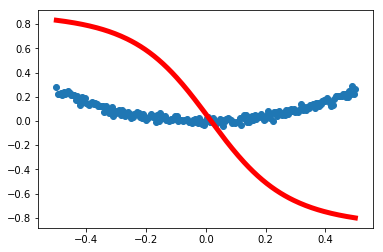

Step: 2000 / Cost = 0.000563


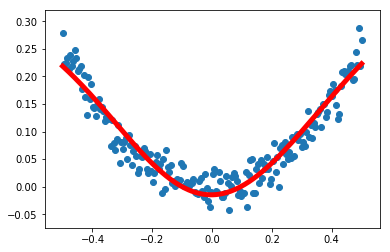

Step: 4000 / Cost = 0.000542


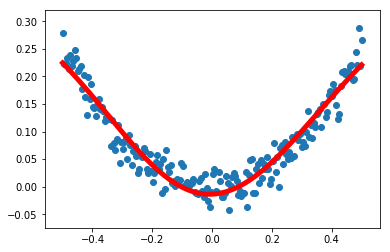

Step: 6000 / Cost = 0.000528


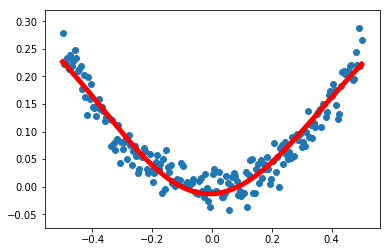

Step: 8000 / Cost = 0.000517


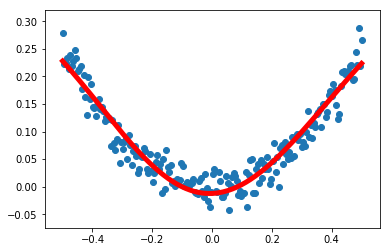

Step: 10000 / Cost = 0.000507


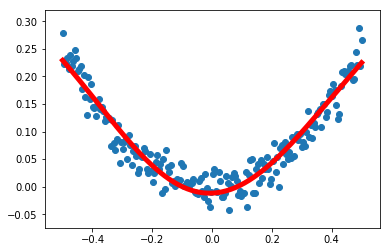

Step: 12000 / Cost = 0.000498


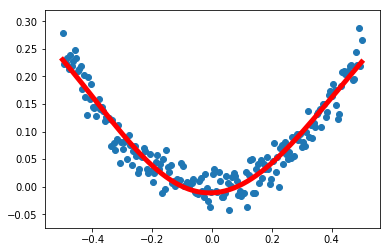

Step: 14000 / Cost = 0.000490


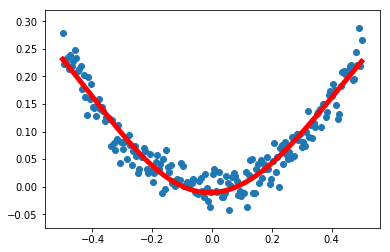

Step: 16000 / Cost = 0.000483


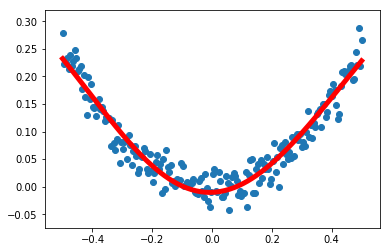

Step: 18000 / Cost = 0.000477


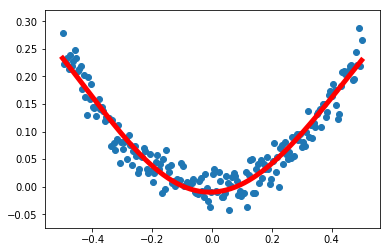

In [7]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(20000):
        sess.run(train, feed_dict={
            x:x_data,
            y:y_data
        })
        if step % 2000 == 0:
            cost = sess.run(loss, feed_dict={
                y:y_data,
                x:x_data
            })
                        
            prediction_value = sess.run(Prediction, feed_dict={
                x:x_data
            })
            
            print("Step: %d / Cost = %f" % (step, cost))
            
            plt.figure()
            plt.scatter(x_data, y_data)
            plt.plot(x_data[0,:], prediction_value[0,:], 'r-', lw=5)
            plt.show()